<h1><center> Quora Insincere Questions classification</center></h1>


### Problem Description:

Quora is a platform where users can ask and answer questions about any topic, any user can ask questions regarding any topic where experts across the world give answers to the questions.

A common problem all the platforms like Quora are facing is toxic and divisive
content. People sometimes ask questions that are inappropriate and, abusive to a
community, questions that are divisive, and questions that make a statement rather than looking for answers. These kinds of questions are referred to as "Insincere questions" by Quora.

According to Quora, an insincere question is described as,

- A question that has a non-neutral tone, is meant to imply a statement about a
group of people and has an exaggerated tone to emphasize a point about a group
of people.

- A question that is disparaging and inflammatory.

- A question that is based on false information, or contains absurd assumptions.

- A question that has sexual content which upsets people.

#### Problem Statement:

Quora uses Machine Learning and manual review to address the problem of Insincere questions, but they wanted to develop more scalable methods to detect these insincere questions. So, Quora conducted a competition on Kaggle where the competitors were given a dataset that contains sincere and insincere questions, competitors need to build a model which can predict whether a given question is insincere or not. 


So, the problem statement given is to build a Machine Learning/Deep Learning model which can predict whether given question is a sincere or insincere.

#### Data Overview:

Source: https://www.kaggle.com/competitions/quora-insincere-questions-classification/data

 Provided data contains 3 files 
 

1.   Train.csv
2.   Test.csv
3.   Embeddings.zip

**Train.csv** and **Test.csv** files contain the following fields,

- **qid**: Unique Identifier for each question,

- **question_text**: text of the question asked

- **target**: a question labeled "insincere" has a value of 1, otherwise 0

Quora didn't wanted the compitetors to use external data sources to get word embeddings. So they provided 4 different pretrained word embeddings of 300 dimensions which are as follows,

**GoogleNews-vectors-negative300** - https://code.google.com/archive/p/word2vec/

**glove.840B.300d** - https://nlp.stanford.edu/projects/glove/

**paragram_300_sl999** - https://cogcomp.org/page/resource_view/106

**wiki-news-300d-1M** - https://fasttext.cc/docs/en/english-vectors.html



*Few Sincere Questions:*
----------------

1 . What is service productivity? In service operation?

2 . Does the mass of a planet affects its period of revolution?

3 . Why will Raymond Blanc never achieve three Michelin stars? I am very familiar with 'le Manoir' and similar establishments having worked in the trade!

4 . What is the best time to post on Instagram to increase my business?

5 . What should you pay attention to to buy street lights?

*Few Insincere Questions:*
-----------------------

1 . How would America's millenial snowflakes survive Marine Corps bootcamp?

2 . Why do minorities get so triggered by mild 'racism'?

3 . Were the dinosaurs Muslim?

4 . Can the caliphate Islamists destroying places and killing people be any success in this modern times?

5 . How awful is Oscar Auliq-Ice as a person?


#### Installing required libraries

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 6.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e69ed331b1788a37b8b21a82daa18caa970e620f9dd884670cfdf761453aa3c9
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
! pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 825 kB 5.2 MB/s 
     |████████████████████████████████| 281 kB 11.9 MB/s 
     |████████████████████████████████| 141 kB 58.0 MB/s 
  Created wheel for swifter: filename=swifter-1.3.2-py3-none-any.whl size=16199 sha256=e9d754949449aa74495e7a8a01367797df3aa0a5a8705b4262135e97d76e6fe4
  Stored in directory: /root/.cache/pip/wheels/ed/9f/74/64543a9fcef6095b5e9428e21674fd208c8ce372a58ffbc818
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
! pip install spacy-langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 8.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=76a1b2f37fde01ebc924946a1a1ed8d9b7daa2c8dfe9ef452cf5eefc0620f306
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect
  Attempting uninstall: langdetect
    Found existing installation: langdetect 1.0.9
    Uninstalling langdetect-1.0.9:
      Successfully uninstalled langdetect-1.0.9


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"'''

'import os\nos.environ[\'KAGGLE_CONFIG_DIR\'] = "/content/drive/MyDrive/Kaggle"'

In [ ]:
%cd /content/drive/MyDrive/Kaggle/

/content/drive/MyDrive/Kaggle


#### Importing required libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from textblob import TextBlob
#from spacy_langdetect import LanguageDetector
#from langdetect import detect

import spacy
import os
import gc
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import swifter

# 1.**Exploratory Data Analysis**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [ ]:
print('There are',train_data.shape[0],'questions in the dataset.')

There are 1306122 questions in the dataset.


In [ ]:
print('There are "',train_data[train_data['target']==1].shape[0],'" insincere questions in the dataset and "',train_data[train_data['target']==0].shape[0],'" sincere questions in the dataset.')


There are " 80810 " insincere questions in the dataset and " 1225312 " sincere questions in the dataset.


### Checking for Null and dulpicate rows in the data

In [ ]:
#removing qid from the data and checking for duplicates
train_data = train_data[['question_text','target']]
print('No.of duplicated questions in the data :',train_data.shape[0] - train_data.groupby(['question_text']).count().reset_index().shape[0])

#checking for null value in the text
print('No.of question with NaN values:',train_data['question_text'].isnull().sum())
print('No.of questions that contain empty strings:',(train_data['question_text'].str.strip().values == '').sum())

No.of duplicated questions in the data : 0
No.of question with NaN values: 0
No.of questions that contain empty strings: 0


### Distribution of class variables

% of sincere questions :: 93.8
% of insincere questions :: 6.2


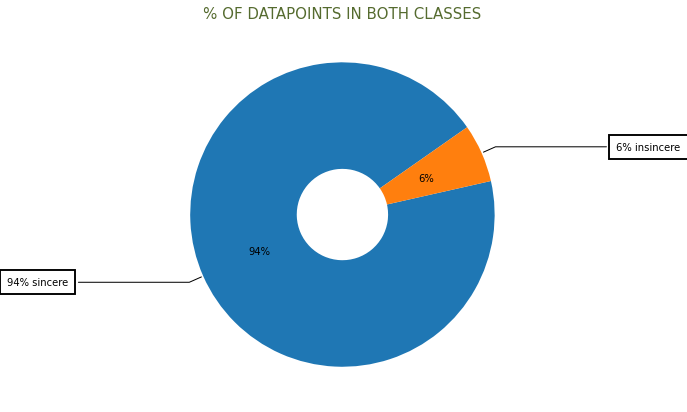

In [ ]:
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
print('% of sincere questions ::',round(train_data.target.value_counts()[0]/train_data.shape[0],3)*100)
print('% of insincere questions ::',round(train_data.target.value_counts()[1]/train_data.shape[0],3)*100)

fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))

wedges,labels,percent = ax.pie(train_data['target'].value_counts(),autopct='%.0f%%',wedgeprops=dict(width=0.7),startangle=35)
#ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)
text = [str(percent[0].get_text())+' sincere',str(percent[1].get_text())+' insincere']
bbox_props = dict(boxstyle="square,pad=0.7", fc="w", ec="k", lw=1.9)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(text[i], xy=(x, y), xytext=(1.80*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('% of datapoints in both classes'.upper(),y=1,color='darkolivegreen',fontdict={'fontsize':15})
plt.show()


- There appears to be no null values or duplicate rows in the dataset.

- Dataset is highly imbalanced with only 6% of questions belonging to insincere questions, there are 1306122 questions intotal with only 80810 questions belonging to insincere questions.

- As there are a lot of sincere questions, balancing the sincere questions data using undersampling can help in better classification of the questions.

### Analysis on Question Text

In [ ]:
sincere_que = train_data[train_data['target'] == 0]
insincere_que = train_data[train_data['target'] == 1]

In [ ]:
i = 1
print('Few Sincere Questions:')
print('-'*25)
for text in sincere_que.sample(40)['question_text']:
  print(i,'.',text)
  i+=1

Few Sincere Questions:
-------------------------
1 . What is service productivity? In service operation?
2 . Does the mass of a planet affects its period of revolution?
3 . Why will Raymond Blanc never achieve three Michelin stars? I am very familiar with 'le Manoir' and similar establishments having worked in the trade!
4 . What is the best time to post on Instagram to increase my business?
5 . What should you pay attention to to buy street lights?
6 . What are the best techniques for growing laurel?
7 . What influenced Adam Levine to become an actor?
8 . Is it possible to apply postcolonial theory to one's work as a lawyer?
9 . How do you get your career back on track after having children and a career change (so you could stay at home with them)?
10 . How does it feel to be poor than rich?
11 . Do females masturbate to porn?
12 . Do you live healthy?
13 . Which is the best filling for teeth?
14 . What is the first division in 10 CBSE board?
15 . How important do school grades matter

In [ ]:
i = 1
print('Few InSincere Questions:')
print('-'*25)
for text in insincere_que.sample(40)['question_text']:
  print(i,'.',text)
  i+=1

Few InSincere Questions:
-------------------------
1 . Why do men rape women and pretend women rape men as a defense against their terrible behavior?
2 . How would America's millenial snowflakes survive Marine Corps bootcamp?
3 . Why do minorities get so triggered by mild 'racism'?
4 . Were the dinosaurs Muslim?
5 . What dose women think about incest with her won son?
6 . Can the caliphate Islamists destroying places and killing people be any success in this modern times?
7 . Is it okay to marry a baby according to Sunni Islam? Her father gave me permission.
8 . How awful is Oscar Auliq-Ice as a person?
9 . Any girls want too know a secret us guys do with our boners?
10 . Why do children lie and manipulate?
11 . Why does Allah let the Palestinians get gassed by the Jews? Is it because he's letting the Jews hurt others for a change?
12 . Is advocating suicide okay?
13 . Why the men don't like the successful women?
14 . Why are some people on the Left so single-minded and violent when ot

### Analysis on some basic text features

In [ ]:
#nltk.download('stopwords')
def plot(column):
  plt.figure(figsize=(16, 6))

  plt.subplot(1,2,1)
  sns.boxplot(x = 'target', y = column, data = train_data)

  plt.subplot(1,2,2)
  sns.distplot(train_data[train_data['target'] == 1][column] , label = "1", color = 'red')
  sns.distplot(train_data[train_data['target'] == 0][column] , label = "0" , color = 'blue' )
  plt.suptitle('Comparision of '+column+' between Sincere and Insincere Questions',fontsize = 'x-large',color = 'darkolivegreen')
  plt.legend()
  plt.show()

def count_unique_words(text):
    return len(set(text.split()))

stop_words = set(stopwords.words('english'))

def count_stopwords(text):
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

#### len of questions

In [ ]:
train_data['question_len'] = train_data['question_text'].str.len()
train_data['num_of_words']=train_data['question_text'].apply(lambda row: len(row.split(" ")))
train_data.head()


,qid,question_text,target,question_len,num_of_words
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15


In [ ]:
test_data['question_len'] = test_data['question_text'].str.len()
test_data['num_of_words']=test_data['question_text'].apply(lambda row: len(row.split(" ")))

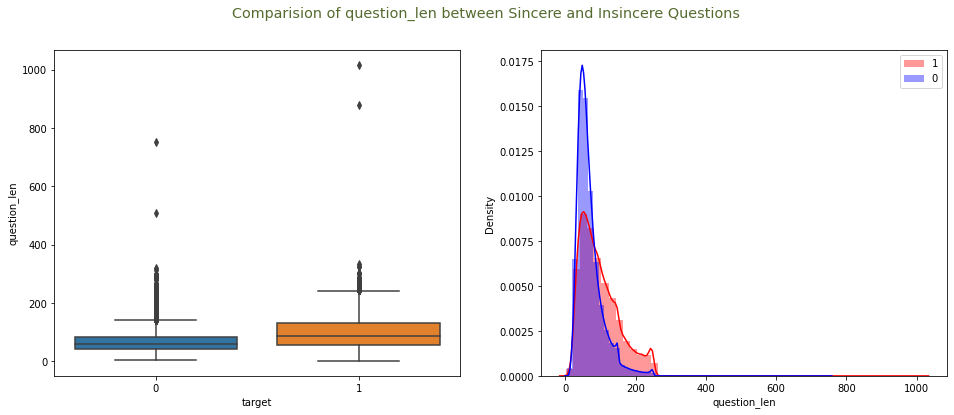

In [ ]:
plot('question_len')

#### word_counts of questions

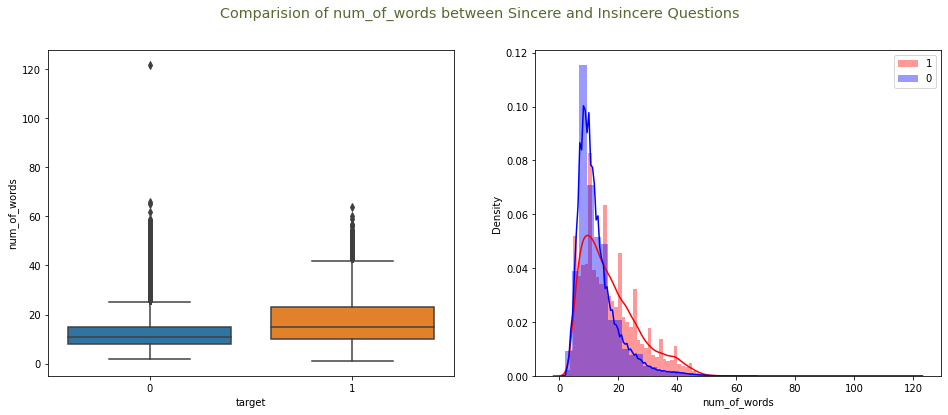

In [ ]:
plot('num_of_words')

#### no.of sentences in questions

Pandas Apply:   0%|          | 0/1306122 [00:00<?, ?it/s]

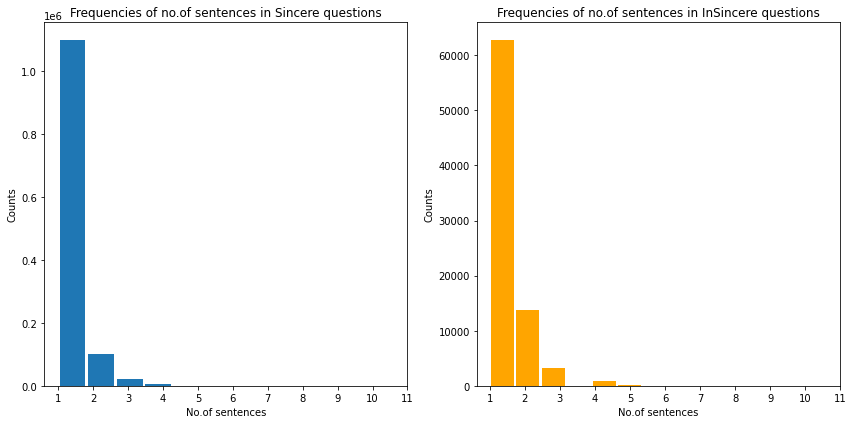

In [ ]:
def count_sent(text):
    return len(nltk.sent_tokenize(text))

train_data['num_of_sentences'] = train_data['question_text'].swifter.apply(count_sent)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(train_data[train_data['target']==0]['num_of_sentences'],bins = 11,rwidth = 0.9)
plt.title('Frequencies of no.of sentences in Sincere questions')
plt.xlabel('No.of sentences')
plt.ylabel('Counts')
plt.xticks(range(1,12))

plt.subplot(122)
plt.hist(train_data[train_data['target']==1]['num_of_sentences'],bins = 11,rwidth = 0.9,color = 'orange')
plt.title('Frequencies of no.of sentences in InSincere questions')
plt.xlabel('No.of sentences')
plt.ylabel('Counts')
plt.xticks(range(1,12))

plt.tight_layout()
plt.show()

In [ ]:
test_data['num_of_sentences'] = test_data['question_text'].swifter.apply(count_sent)

Pandas Apply:   0%|          | 0/375806 [00:00<?, ?it/s]

#### Unique words per question

Pandas Apply:   0%|          | 0/1306122 [00:00<?, ?it/s]

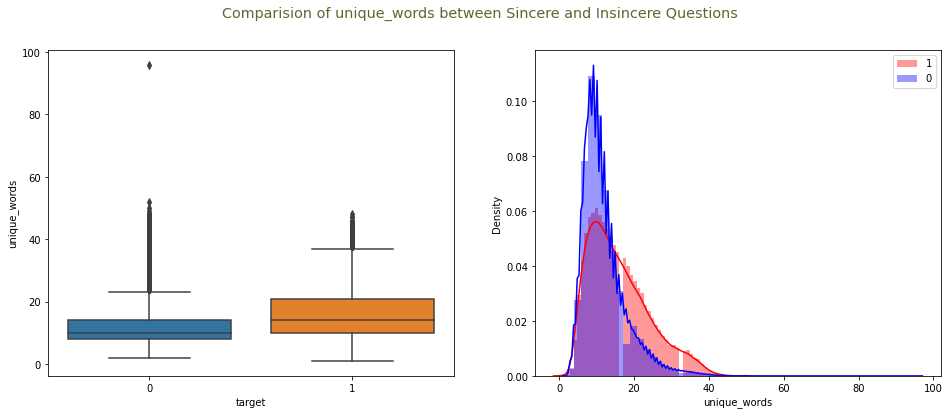

In [ ]:
train_data['unique_words'] = train_data['question_text'].swifter.apply(count_unique_words)
plot('unique_words')

In [ ]:
test_data['unique_words'] = test_data['question_text'].swifter.apply(count_unique_words)

Pandas Apply:   0%|          | 0/375806 [00:00<?, ?it/s]

#### stop words in question

Pandas Apply:   0%|          | 0/1306122 [00:00<?, ?it/s]

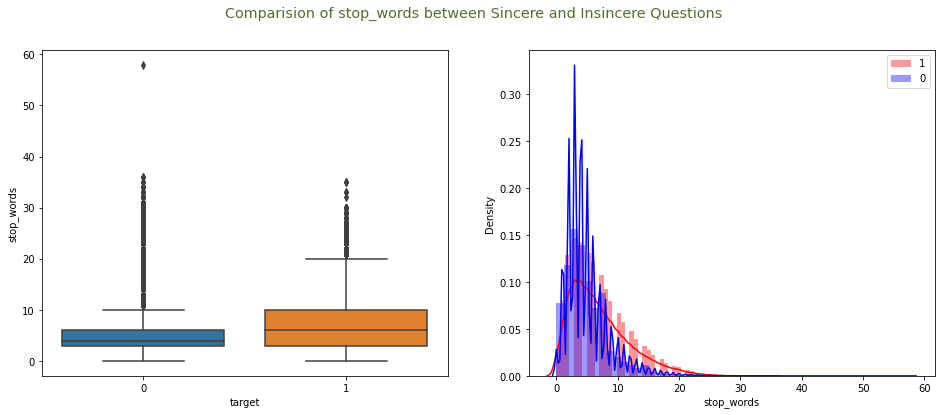

In [ ]:
train_data['stop_words'] = train_data['question_text'].swifter.apply(count_stopwords)
plot('stop_words')

In [ ]:
test_data['stop_words'] = test_data['question_text'].swifter.apply(count_stopwords)

Pandas Apply:   0%|          | 0/375806 [00:00<?, ?it/s]

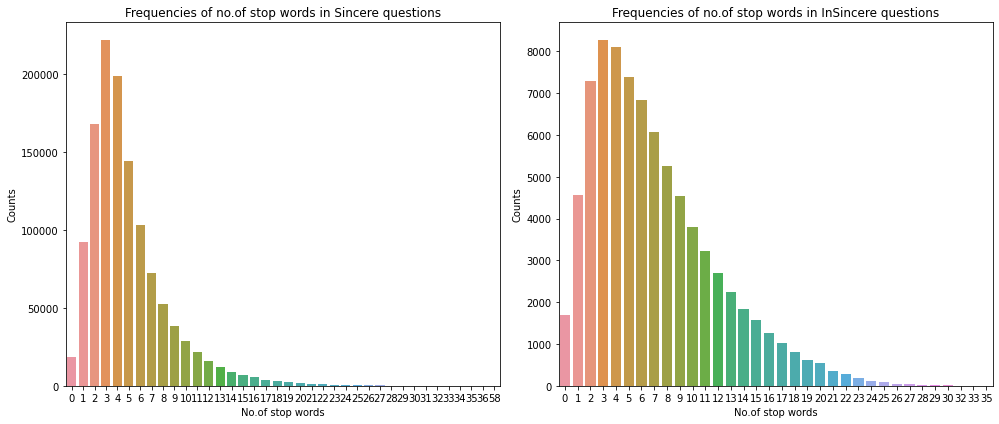

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot(data = train_data[train_data['target']==0],x = 'stop_words')
plt.title('Frequencies of no.of stop words in Sincere questions')
plt.xlabel('No.of stop words')
plt.ylabel('Counts')
#plt.xticks(range(1,12))

plt.subplot(122)
sns.countplot(data = train_data[train_data['target']==1],x = 'stop_words')
plt.title('Frequencies of no.of stop words in InSincere questions')
plt.xlabel('No.of stop words')
plt.ylabel('Counts')
#plt.xticks(range(1,12))

plt.tight_layout()
plt.show()

- None of the above features of the text seems to be important as there is no clear seperation between the two classes, distributions of both classes overlap for all the basic features.

In [ ]:
nlp = spacy.load("en_core_web_sm")
#doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

def parts_of_speech(df):
  pos = {}
  for text in df.question_text.values:
    doc = nlp(text)
    for token in doc:
      if token.pos_ in pos.keys():
        pos[token.pos_] += 1
      else:
        pos[token.pos_] = 1
  return pos

def word_entities(df):
  entities = {}
  for text in df.question_text.values:
    doc = nlp(text)
    for ent in doc.ents:
      if ent.label_ in entities.keys():
        entities[ent.label_] += 1
      else:
        entities[ent.label_] = 1
  return entities


#### Analysis on parts of speech of text

In [ ]:
%%time
sincere_pos = sincere_que.sample(frac = 0.4).question_text.swifter.apply(parts_of_speech)
insincere_pos = insincere_que.question_text.swifter.apply(parts_of_speech)

Pandas Apply:   0%|          | 0/1225312 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/80810 [00:00<?, ?it/s]

CPU times: user 3h 28min 23s, sys: 1min 44s, total: 3h 30min 7s
Wall time: 3h 30min


<BarContainer object of 18 artists>

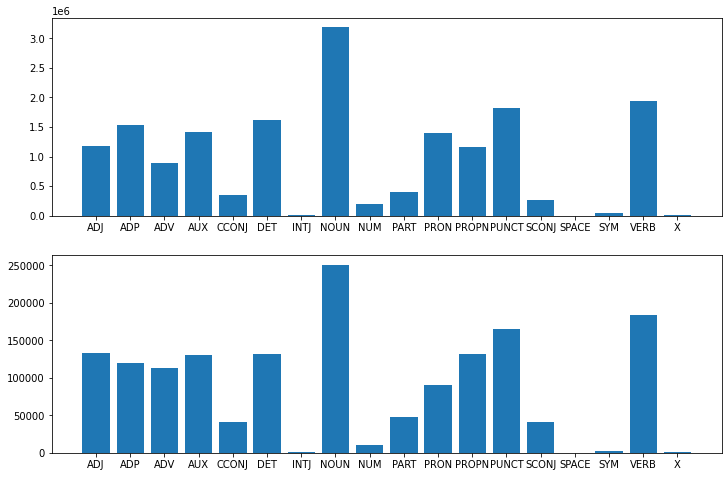

In [ ]:
sincere_pos={key: value for key, value in sorted(sincere_pos.items())}
insincere_pos={key: value for key, value in sorted(insincere_pos.items())}

fig,ax = plt.subplots(2,figsize = (12,8))
ax[0].bar(sincere_pos.keys(),sincere_pos.values())
ax[0].title('')
ax[1].bar(insincere_pos.keys(),insincere_pos.values())


#### Analysis on Word Entities

In [ ]:
%%time

sincere_entities = word_entities(sincere_que.sample(frac = 0.1))
insincere_entities = word_entities(insincere_que)

CPU times: user 33min 41s, sys: 7.55 s, total: 33min 49s
Wall time: 33min 45s


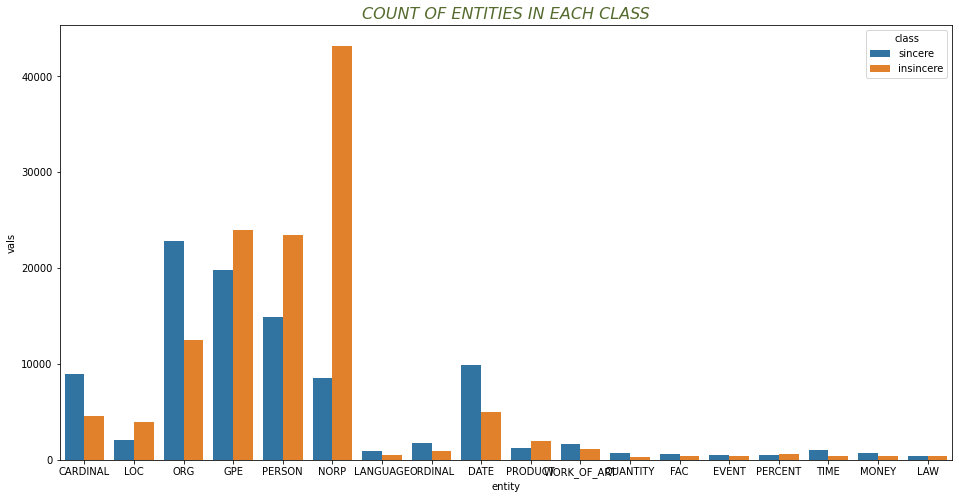

In [ ]:
class_label = []
class_label.extend(['sincere']*len(sincere_entities))
class_label.extend(['insincere']*len(insincere_entities))

vals = list(sincere_entities.values())
vals.extend(list(insincere_entities.values()))

entities = list(sincere_entities.keys())
entities.extend(list(insincere_entities.keys()))

entity_df = pd.DataFrame({'entity':entities,'vals':vals,'class':class_label})

plt.figure(figsize = (16,8))
sns.barplot(data = entity_df,x = 'entity',y = 'vals',hue = 'class')
plt.title('Count of entities in each class'.upper(),fontdict = {'fontsize':16,'style':'italic'},color = 'darkolivegreen')
plt.show()


- All the Entities appear to occur equal no.of times in both classes, but if we observe the counts of the enitity-'NORP'(which indicates Nationality, Religion,and political groups) in both classes, insincere questions contains this entity significantly more no.of times than the sincere questions.

#### checking for languages other than english in the questions

In [ ]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

train_data['Lang'] = train_data['question_text'].swifter.apply(det)

Pandas Apply:   0%|          | 0/1306122 [00:00<?, ?it/s]

In [ ]:
print('The dataset contains questions belonging to',len(train_data['Lang'].unique()),'different languages')

The dataset contains questions belonging to 45 different languages


In [ ]:
# print a sample question from each language predicted by the lang_detect module
for lang in train_data['Lang'].unique():
  print('Language: ',lang)
  print('-'*9)
  print(train_data[train_data['Lang']==lang].iloc[0]['question_text'])
  print('\n')

Language:  en
---
How did Quebec nationalists see their province as a nation in the 1960s?


Language:  nl
---
How many days will it take to get rid of spleen enlargement?


Language:  tl
---
Does ragging happen at NIFT Bangalore?


Language:  ca
---
R sq. cos-1 when r=18.5 equals?


Language:  pt
---
What are some quotes from Tomás de Torquemada?


Language:  fr
---
Do intelligent people ask questions?


Language:  de
---
What is Transient Voltage?


Language:  af
---
How does bikini look like?


Language:  cy
---
How do you load a black powder rifle?


Language:  pl
---
How do I keep my lazyness away?


Language:  no
---
Is tigernut milk fattening?


Language:  it
---
IS starting a porn studio illegal in India?


Language:  da
---
Does Kapil Dev have children?


Language:  id
---
When will Pakistan return Pakistan back to India?


Language:  sv
---
Was Tirupati never attacked?


Language:  sl
---
Is Slavoj Žižek similar to Karl Marx?


Language:  so
---
How do you say 'table' in Urdu

- Data contains questions asked not just in english but also in other languages and there are also questions asked in english that contains words from other languages.

- Lang_detect module has predicted that a total of 45 uniques language questions are present in the dataset, but it appears that the Lang_detect module predicted few questions that belong to english as other languages.

- All the non-english characters will be removed to limit the questions to english language

#### Preprocessing Question text

In [ ]:
short_forms = {"ain't": "is not",
            "aren't": "are not",
            "can't": "cannot",
            "'cause": "because",
            "could've": "could have",
            "couldn't": "could not",
            "didn't": "did not",
            "doesn't": "does not",
            "don't": "do not",
            "hadn't": "had not",
            "hasn't": "has not",
            "haven't": "have not",
            "he'd": "he would",
            "he'll": "he will",
            "he's": "he is",
            "how'd'y": "how do you",
            "how'd": "how did",
            "how'll": "how will",
            "how's": "how is",
            "i'd've": "i would have",
            "i'd": "i would",
            "i'll've": "i will have",
            "i'll": "i will",
            "i'm": "i am",
            "i've": "i have",
            "isn't": "is not",
            "it'd've": "it would have",
            "it'd": "it would",
            "it'll've": "it will have",
            "it'll": "it will",
            "it's": "it is",
            "let's": "let us",
            "ma'am": "madam",
            "mayn't": "may not",
            "might've": "might have",
            "mightn't've": "might not have",
            "mightn't": "might not",
            "must've": "must have",
            "mustn't've": "must not have",
            "mustn't": "must not",
            "needn't've": "need not have",
            "needn't": "need not",
            "o'clock": "of the clock",
            "oughtn't've": "ought not have",
            "oughtn't": "ought not",
            "shan't've": "shall not have",
            "shan't": "shall not",
            "sha'n't": "shall not",
            "she'd've": "she would have",
            "she'd": "she would",
            "she'll've": "she will have",
            "she'll": "she will",
            "she's": "she is",
            "should've": "should have",
            "shouldn't've": "should not have",
            "shouldn't": "should not",
            "so've": "so have",
            "so's": "so as",
            "this's": "this is",
            "that'd've": "that would have",
            "that'd": "that would",
            "that's": "that is",
            "there'd've": "there would have",
            "there'd": "there would",
            "there's": "there is",
            "here's": "here is",
            "they'd've": "they would have",
            "they'd": "they would",
            "they'll've": "they will have",
            "they'll": "they will",
            "they're": "they are",
            "they've": "they have",
            "to've": "to have",
            "wasn't": "was not",
            "we'd've": "we would have",
            "we'd": "we would",
            "we'll've": "we will have",
            "we'll": "we will",
            "we're": "we are",
            "we've": "we have",
            "weren't": "were not",
            "what'll've": "what will have",
            "what'll": "what will",
            "what're": "what are",
            "what's": "what is",
            "what've": "what have",
            "when's": "when is",
            "when've": "when have",
            "where'd": "where did",
            "where's": "where is",
            "where've": "where have",
            "who'll've": "who will have",
            "who'll": "who will",
            "who's": "who is",
            "who've": "who have",
            "why's": "why is",
            "why've": "why have",
            "will've": "will have",
            "won't've": "will not have",
            "won't": "will not",
            "would've": "would have",
            "wouldn't've": "would not have",
            "wouldn't": "would not",
            "y'all'd've": "you all would have",
            "y'all'd": "you all would",
            "y'all're": "you all are",
            "y'all've": "you all have",
            "y'all": "you all",
            "you'd've": "you would have",
            "you'd": "you would",
            "you'll've": "you will have",
            "you'll": "you will",
            "you're": "you are",
            "you've": "you have"}

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
 
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    
    x = x.replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    #x = re.sub(r"([0-9]+)000000", r"\1m", x)
    #x = re.sub(r"([0-9]+)000", r"\1k", x)
    for word in short_forms.keys():
      x = x.replace(word,short_forms[word])
    
    
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    example1 = BeautifulSoup(x)
    x = example1.get_text(strip=True)
    
    if type(x) == type(''):
        
        x = re.sub("[^a-zA-Z\s]+", "",x) 
        
        #x_split = x.split(' ')
        #x = " ".join(stemmer.stem(word) for word in x_split if word not in STOP_WORDS)
        
        x = ' '.join(x.split())
         
    
               
    
    return x

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
test_data[['question_len', 'num_of_words',
       'num_of_sentences', 'unique_words', 'stop_words']]

,question_len,num_of_words,num_of_sentences,unique_words,stop_words
0,101,21,1,19,10
1,162,30,2,23,12
2,50,10,1,10,5
3,22,3,1,3,1
4,48,7,1,7,0
...,...,...,...,...,...
375801,50,9,1,8,2
375802,53,9,1,9,4
375803,50,9,1,9,2
375804,43,8,1,7,4


In [ ]:
%%time

preprocessed_data_train = pd.DataFrame([])

preprocessed_data_train['question'] = train_data['question_text'].swifter.apply(preprocess)

for column in ['question_len', 'num_of_words','num_of_sentences', 'unique_words', 'stop_words']:
         preprocessed_data_train[column] = train_data[column]

preprocessed_data_train.to_csv('train_que_preprocessed.csv',index = False)

Pandas Apply:   0%|          | 0/1306122 [00:00<?, ?it/s]

CPU times: user 8min 5s, sys: 30.3 s, total: 8min 36s
Wall time: 10min 55s


In [ ]:
for question in preprocessed_data_train.loc[:5]['question']:
  print(question)

how did quebec nationalists see their province as a nation in the s
do you have an adopted dog how would you encourage people to adopt and not shop
why does velocity affect time does velocity affect space geometry
how did otto von guericke used the magdeburg hemispheres
can i convert montra helicon d to a mountain bike by just changing the tyres
is gaza slowly becoming auschwitz dachau or treblinka for palestinians


In [ ]:
'''preprocessed_data_test = pd.DataFrame([])
preprocessed_data_test = test_data['question_text'].swifter.apply(preprocess)

for column in ['question_len', 'num_of_words','num_of_sentences', 'unique_words', 'stop_words']:
         preprocessed_data_test[column] = test_data[column]

preprocessed_data_test.to_csv('test_que_preprocessed.csv',index = False)'''

Pandas Apply:   0%|          | 0/375806 [00:00<?, ?it/s]

In [ ]:
preprocessed_que = pd.read_csv('train_que_preprocessed.csv')
preprocessed_que.head(10)

,question,question_len,num_of_words,num_of_sentences,unique_words,stop_words
0,how did quebec nationalists see their province...,72,13,1,13,6
1,do you have an adopted dog how would you encou...,81,16,1,15,8
2,why does velocity affect time does velocity af...,67,10,2,8,1
3,how did otto von guericke used the magdeburg h...,57,9,1,9,2
4,can i convert montra helicon d to a mountain b...,77,15,1,15,5
5,is gaza slowly becoming auschwitz dachau or tr...,72,10,1,10,2
6,why does quora automatically ban conservative ...,113,18,1,17,9
7,is it crazy if i wash or wipe my groceries off...,69,14,2,14,6
8,is there such a thing as dressing moderately a...,102,18,1,17,11
9,is it just me or have you ever been in this ph...,246,44,2,39,23


#### Analysis on most frequent words of both classes

In [ ]:
sincere_que = preprocessed_que[preprocessed_que['target'] == 0]
insincere_que = preprocessed_que[preprocessed_que['target'] == 1]

In [ ]:
sincere_que.question.values

array(['quebec nationalist see province nation 1960s',
       'adopted dog would encourage people adopt shop',
       'velocity affect time velocity affect space geometry', ...,
       'foam insulation toxic',
       'one start research project based biochemistry ug level',
       'win battle wolverine puma'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sincere_vectorizer = CountVectorizer(stop_words = set(STOPWORDS),strip_accents = 'ascii',min_df = 10)
sincere_bow = sincere_vectorizer. fit_transform(sincere_que['question'].values.astype(str))

insincere_vectorizer = CountVectorizer(stop_words = set(STOPWORDS),strip_accents = 'ascii',min_df = 10)
insincere_bow = insincere_vectorizer. fit_transform(insincere_que['question'].values.astype(str))

In [ ]:
sincere_word_counts = sincere_bow.sum(axis = 0).A1
insincere_word_counts = insincere_bow.sum(axis = 0).A1

sincere_features = sincere_vectorizer.get_feature_names_out()
insincere_features = insincere_vectorizer.get_feature_names_out()

sincere_wordCount_dic = dict(zip(sincere_features,sincere_word_counts))
sincere_wordCount_dic = {k: v for k, v in sorted(sincere_wordCount_dic.items(), key=lambda item: item[1],reverse = True)}

insincere_wordCount_dic = dict(zip(insincere_features,insincere_word_counts))
insincere_wordCount_dic = {k: v for k, v in sorted(insincere_wordCount_dic.items(), key=lambda item: item[1],reverse = True)}

<BarContainer object of 30 artists>

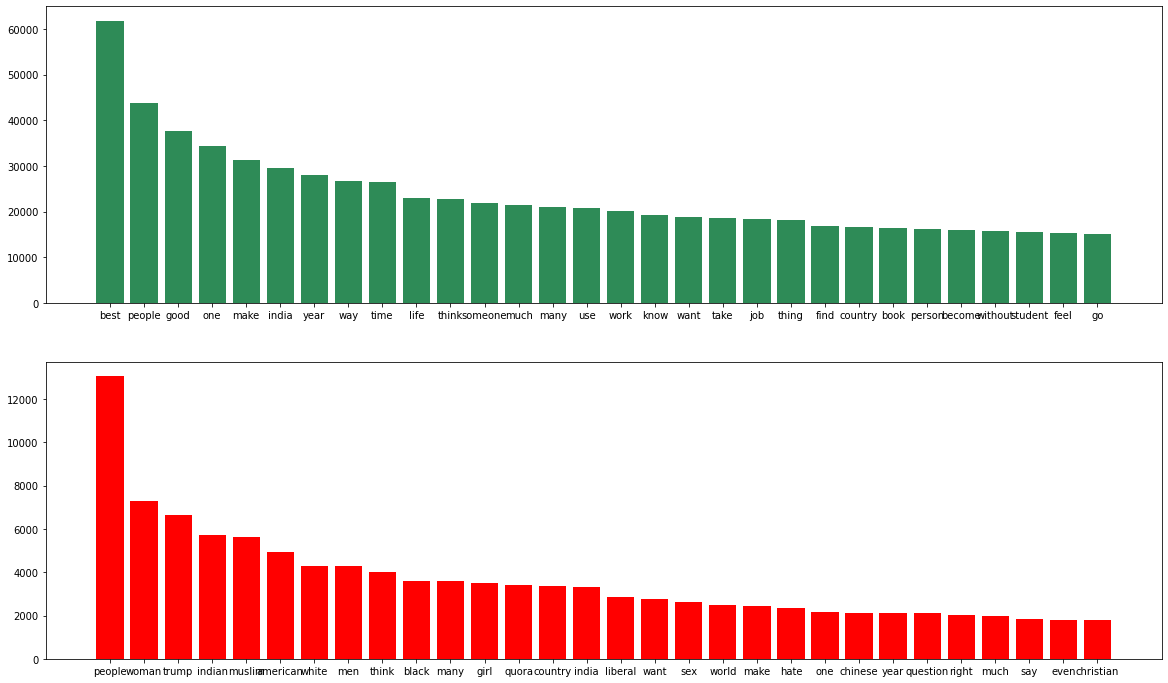

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,12))
ax[0].bar(list(sincere_wordCount_dic.keys())[:30],list(sincere_wordCount_dic.values())[:30],color = 'seagreen')
ax[1].bar(list(insincere_wordCount_dic.keys())[:30],list(insincere_wordCount_dic.values())[:30],color = 'red')

In [ ]:
from wordcloud import WordCloud,STOPWORDS


stopwords = set(STOPWORDS)

sincere_text = " ".join(str(que) for que in sincere_que.question.values)
insincere_text = " ".join(str(que) for que in insincere_que.question.values)

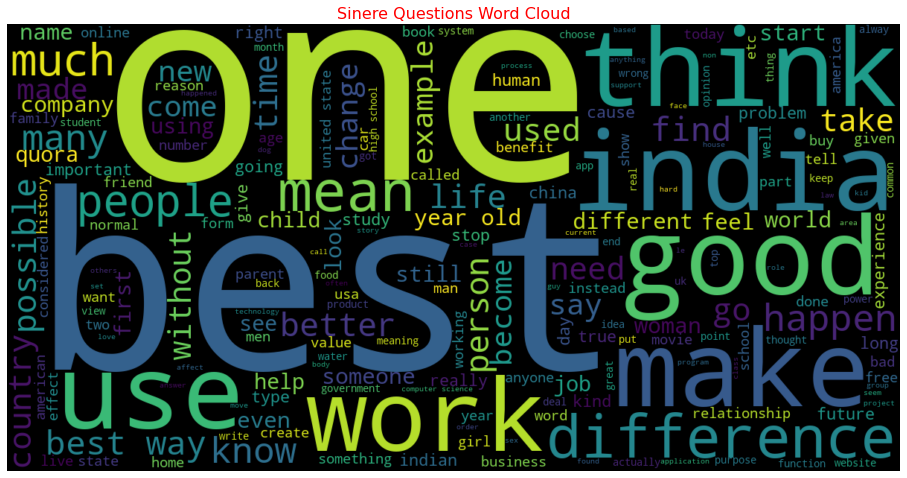

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black',
                          width=1200,
                          height=600,).generate(sincere_text)
plt.figure(figsize=(16,12))
plt.title('Sinere Questions Word Cloud',fontdict={'fontsize':16},color = 'red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

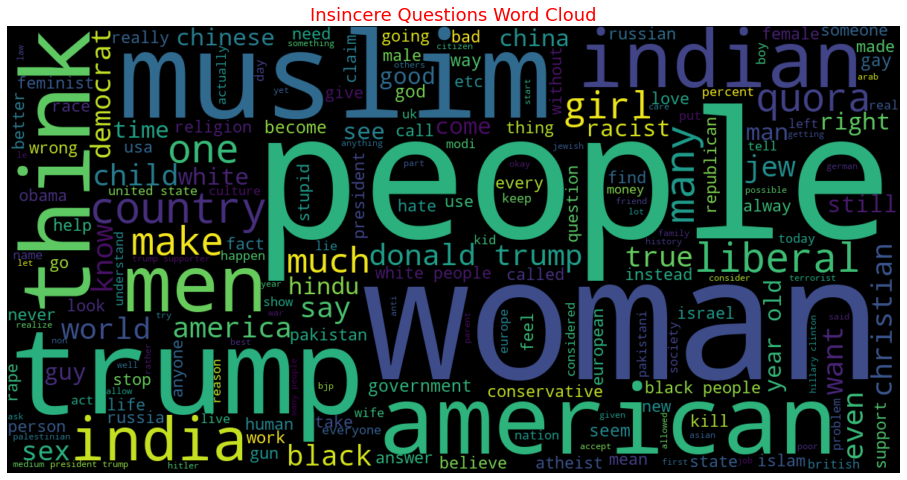

In [ ]:
wordcloud = WordCloud(stopwords=stopwords, background_color='black',
                          width=1200,
                          height=600,).generate(insincere_text)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Insincere Questions Word Cloud',fontdict={'fontsize':18},color = 'red')
plt.axis("off")
plt.show()

- The most frequent words in the insincere questions refer to nationality, religion, race, gender and political terms.

- Sincere questions contains positive words where as insincere questions contain words that trigger a group of people.

In [ ]:
'''from gensim import models
word2vec = models.KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/Kaggle/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin', binary=True)

word2vec_dict = dict()
for word in word2vec.wv.vocab:
  word2vec_dict[word] = word2vec.word_vec(word)
print('Loaded %s word vectors.' % len(word2vec_dict))'''